# * AUTHOR: NIKITA DUSHYANT SANE. * 

## * *DATA SCIENCE & BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION. #GRIPSEPT21*

## * *TASK #1: PREDICTION  USING SUPERVISED MACHINE LEARNING.*

##### * PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NO. OF STUDY HOURS. *

##### * LANGUAGE: PYTHON
##### * IDE: JUPYTER NOTEBOOK

##### * IMPORTING REQUIRED LIBRARIES

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### * READING DATA FROM REMOTE URL

In [36]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

##### * EXPLORING DATA

In [37]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [38]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


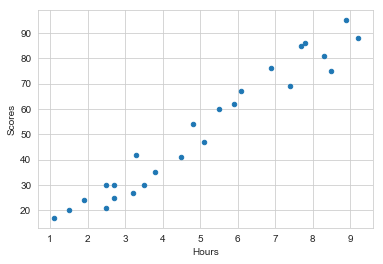

In [40]:
data.plot(kind="Scatter",x="Hours",y="Scores");
plt.show()

In [41]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [42]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [43]:
hours=data["Hours"]
scores=data["Scores"]

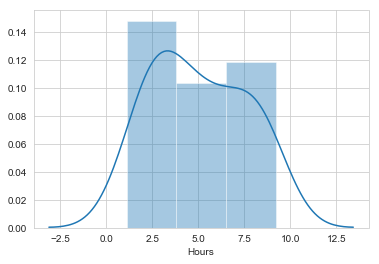

In [57]:
sns.distplot(hours)

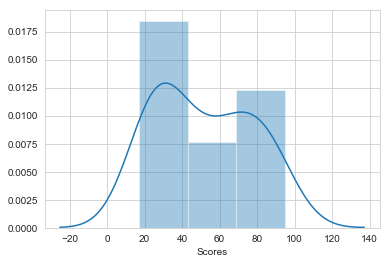

In [45]:
sns.distplot(scores)

### * *LINEAR REGRESSION*

In [46]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [48]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

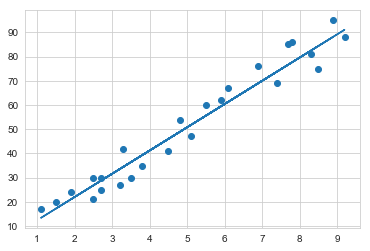

In [49]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [50]:
y_pred=reg.predict(x_test)

In [51]:
actual_predicted=pd.DataFrame({"Target":y_test,"Predicted":y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


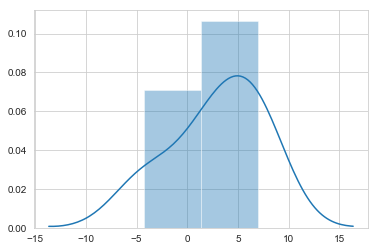

In [56]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

##### * WHAT WILL BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS/DAY?

In [53]:
h=9.25
s=reg.predict([[h]])
print("IF A STUDENT STUDIES FOR {} HOURS PER DAY HE/SHE WILL SCORE {} % IN EXAM".format(h,s))

IF A STUDENT STUDIES FOR 9.25 HOURS PER DAY HE/SHE WILL SCORE [91.56986604] % IN EXAM


##### * MODEL EVALUATION 

In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 SCORE:",r2_score(y_test,y_pred))

MEAN ABSOLUTE ERROR: 4.5916495300630285
R2 SCORE: 0.971014141329942


### * THANK YOU! *